# Week 5 - Regression Modeling
Week Five - August 22, 2022


Reminder, the author has all of the code available on [Github](https://github.com/joelgrus/data-science-from-scratch)

The data set is included in this repo, but sourced from [Kaggle](https://www.kaggle.com/datasets/bagavathypriya/spam-ham-dataset)

## Chapter 14 - Simple Linear Regression

In [7]:
import random, sys
from typing import Tuple

!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} tqdm
from tqdm.notebook import tqdm

sys.path.insert(0,os.path.abspath('.'))
from scratch.statistics import num_friends_good, daily_minutes_good
from scratch.statistics import de_mean
from scratch.linear_algebra import Vector
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean
from scratch.gradient_descent import gradient_step

def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha, beta, x_i) - y_i


def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))



def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y,
    find the least-squares values of alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
assert least_squares_fit(x, y) == (-5, 3)

alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905


def total_sum_of_squares(y: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330
    
num_epochs = 10000
random.seed(0)
    
guess = [random.random(), random.random()]  # choose random value to start
    
learning_rate = 0.00001
    
with tqdm(range(num_epochs)) as t:
        for _ in t:
            alpha, beta = guess
    
            # Partial derivative of loss with respect to alpha
            grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Partial derivative of loss with respect to beta
            grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                         for x_i, y_i in zip(num_friends_good,
                                             daily_minutes_good))
    
            # Compute loss to stick in the tqdm description
            loss = sum_of_sqerrors(alpha, beta,
                                   num_friends_good, daily_minutes_good)
            t.set_description(f"loss: {loss:.3f}")
    
            # Finally, update the guess
            guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)
    
# We should get pretty much the same results:
alpha, beta = guess
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

  0%|          | 0/10000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Chapter 15 - Multiple Regression

In [11]:
from typing import List
from typing import List
import random
from tqdm.notebook import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step
from scratch.simple_linear_regression import total_sum_of_squares
from scratch.statistics import median, standard_deviation
from scratch.probability import normal_cdf
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step
from typing import Tuple
import datetime
from scratch.linear_algebra import dot, Vector

inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1"""
    return dot(x, beta)

[1,    # constant term
 49,   # number of friends
 4,    # work hours per day
 0]    # doesn't have PhD

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4]  # so prediction = 4 + 8 + 12 = 24

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm(range(num_steps), desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

from typing import TypeVar, Callable

X = TypeVar('X')        # Generic type for data
Stat = TypeVar('Stat')  # Generic type for "statistic"

def bootstrap_sample(data: List[X]) -> List[X]:
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
far_from_100 = ([99.5 + random.random()] +
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])


medians_close = bootstrap_statistic(close_to_100, median, 100)

medians_far = bootstrap_statistic(far_from_100, median, 100)

assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        # if the coefficient is positive, we need to compute twice the
        # probability of seeing an even *larger* value
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        # otherwise twice the probability of seeing a *smaller* value
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

assert p_value(30.58, 1.27)   < 0.001  # constant term
assert p_value(0.972, 0.103)  < 0.001  # num_friends
assert p_value(-1.865, 0.155) < 0.001  # work_hours
assert p_value(0.923, 1.249)  > 0.4    # phd

# alpha is a *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    """estimate error plus ridge penalty on beta"""
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

from scratch.linear_algebra import add

def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    """gradient of just the ridge penalty"""
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    """
    the gradient corresponding to the ith squared error term
    including the ridge penalty
    """
    return add(sqerror_gradient(x, y, beta),
               ridge_penalty_gradient(beta, alpha))



learning_rate = 0.001

def least_squares_fit_ridge(xs: List[Vector],
                            ys: List[float],
                            alpha: float,
                            learning_rate: float,
                            num_steps: int,
                            batch_size: int = 1) -> Vector:
    # Start guess with mean
    guess = [random.random() for _ in xs[0]]

    for i in range(num_steps):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_ridge_gradient(x, y, guess, alpha)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

    
random.seed(0)
# I used trial and error to choose niters and step_size.
# This will run for a while.
learning_rate = 0.001
    
beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)
assert 30.50 < beta[0] < 30.70  # constant
assert  0.96 < beta[1] <  1.00  # num friends
assert -1.89 < beta[2] < -1.85  # work hours per day
assert  0.91 < beta[3] <  0.94  # has PhD
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68

def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
        x_sample = [x for x, _ in pairs]
        y_sample = [y for _, y in pairs]
        beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
        print("bootstrap sample", beta)
        return beta
    
random.seed(0) # so that you get the same results as me
    
# This will take a couple of minutes!
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)),
                                          estimate_sample_beta,
                                          100)
    
bootstrap_standard_errors = [
        standard_deviation([beta[i] for beta in bootstrap_betas])
        for i in range(4)]
    
print(bootstrap_standard_errors)
    
    # [1.272,    # constant term, actual error = 1.19
    #  0.103,    # num_friends,   actual error = 0.080
    #  0.155,    # work_hours,    actual error = 0.127
    #  1.249]    # phd,           actual error = 0.998
    
random.seed(0)
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.0,  # alpha
                                     learning_rate, 5000, 25)
# [30.51, 0.97, -1.85, 0.91]
assert 5 < dot(beta_0[1:], beta_0[1:]) < 6
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0) < 0.69
    
beta_0_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.1,  # alpha
                                       learning_rate, 5000, 25)
# [30.8, 0.95, -1.83, 0.54]
assert 4 < dot(beta_0_1[1:], beta_0_1[1:]) < 5
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0_1) < 0.69
    
    
beta_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 1,  # alpha
                                     learning_rate, 5000, 25)
# [30.6, 0.90, -1.68, 0.10]
assert 3 < dot(beta_1[1:], beta_1[1:]) < 4
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_1) < 0.69
    
beta_10 = least_squares_fit_ridge(inputs, daily_minutes_good,10,  # alpha
                                      learning_rate, 5000, 25)
# [28.3, 0.67, -0.90, -0.01]
assert 1 < dot(beta_10[1:], beta_10[1:]) < 2
assert 0.5 < multiple_r_squared(inputs, daily_minutes_good, beta_10) < 0.6

least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.49402029547432, 1.0393791030498776, -1.9516851948558502, 0.7483721251697333]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.149963287526045, 1.0005300432763113, -2.0650380122822543, 3.177179854834797]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.202826897693722, 1.0017089956376213, -1.5294248424787367, 0.9528580285760854]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.29481217471851, 0.959264729494101, -1.9120875473727545, 0.039471107599519425]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.124144227949955, 0.8569794405277468, -1.9936770520754086, 1.0416943131373024]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.8691994453096, 0.7748022870492418, -2.0087625702876446, -1.2407036547656678]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.08119759650208, 0.998386254386918, -1.9833984114987815, 0.9567646217580389]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.254530450577782, 0.9763387220017684, -1.7430339427043595, 1.9944240584590935]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.649174199331632, 0.9389340937491032, -1.9733848473304205, -0.15249287969349437]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.040109260720964, 1.0531247386421572, -1.7694878560354388, 1.302971911084249]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.066927054721297, 1.2792640005590372, -1.937339904947856, 0.9183668519320846]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.740476303331718, 0.9538879291586574, -2.0689725879612477, 1.4785830120835612]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.46654084062671, 0.9837739845117637, -1.9915052407093472, 3.150029950640157]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.97515705531374, 0.9420086669374396, -2.0367671746636065, 0.6323599067111714]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.478778128163995, 0.8623617407485805, -1.8798782324632368, -0.11949170941208796]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [33.87286992682308, 0.8824018752321863, -1.8978803929581156, -1.0333647107478692]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.272206898314987, 1.0899411603739348, -1.8911943299601002, 3.162677841885805]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.83577809561691, 1.0242186355671827, -1.9209251081222494, 1.3383795133620962]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.211162672015906, 1.458352440392638, -1.70241171517105, 0.94520401518726]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.93552336056075, 0.9470529669956465, -1.8491245571618218, 0.8573641103651921]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.636052325886002, 0.9966176913889679, -1.8308401560119625, 0.13862673979220685]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.855945311129382, 0.9925731301194982, -1.834813509355548, 1.9711641797749935]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.77226728370608, 1.0493381798575807, -1.6999309651266667, 0.9221651877575128]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.78470035821775, 0.9629668755117143, -1.7818333154132011, 1.905170320676074]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.769457992268443, 0.9040180814550004, -1.867677593282121, -0.7957987643064021]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.06836087625883, 0.9237365767889174, -1.7326788050658604, 1.9044381512517516]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.248924522774857, 1.0251706036709467, -1.6396068581125103, 1.7875039505127974]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [26.160390418551746, 1.3566609275406472, -1.880731098382104, 3.884946816272215]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.9708823034869, 0.8717159490168253, -1.8037586194211703, -0.23788897755135452]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.580903591168788, 0.9610711598856186, -1.8984859248085817, -0.0023187395782722853]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.433330253362577, 0.8768141821390377, -1.7328584033279486, -0.10210988051437449]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.984236860566945, 1.036149466142919, -2.2200016449095226, 1.0886749895563579]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.28237674477942, 1.0858388836439414, -1.74280602847473, 1.4397328297413239]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.65460047430859, 0.9454408039075628, -1.7320071301269266, -0.1485862182089119]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.118139496835955, 0.893808801696634, -1.9153563192896768, 2.0598345811489462]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.95488463195938, 0.9940567914003665, -1.7605085370056377, 1.6096257131696945]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.000164842544855, 0.962368315956188, -1.9115208623969564, 0.7473190835230143]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.825204744897878, 0.8912590208026672, -1.770469093607492, 0.7459655949536621]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.366136812382027, 1.012558241060829, -1.6182773155952548, 1.017025703754098]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.94295970143512, 1.0167217566773747, -1.5621167917565122, -0.1030904763985423]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.962898858207343, 1.0652251821283687, -1.926924147663584, 2.0385736378519947]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.525302041791818, 0.9658944102293198, -1.8870631894489638, 0.5367690208128764]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.6785320563259, 1.0139828545599132, -1.7817299670979692, 1.6026393229652947]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.09073747870904, 1.0047123547747132, -1.9560265455918162, 2.75259429615735]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.937038893678913, 0.9670590611928079, -2.1124811600264293, 0.3258045605146989]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.78930855900356, 1.1730115746597942, -1.7835138640623003, 3.2623158308236095]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.14754912309552, 0.9326436111603991, -1.7707952504307622, -1.099359064604309]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.813727613195653, 0.9683784085384612, -2.019078886892217, 0.7501206686148623]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.223398353230184, 0.9373764744862103, -1.5323607166675373, -0.01469994075209993]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.01777500444891, 1.091598878794665, -1.6190191022832499, 2.397154344588124]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.342668886496593, 0.9815156932180105, -1.9184777914462317, 1.5482939749639446]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.53937166649288, 1.060883971208886, -2.2704689582768722, 0.3681597653761555]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.106198499206915, 0.9657134612613777, -1.7191529436530641, -0.6267619207221298]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.993282359977137, 0.9757399392816419, -1.9767875486880904, 2.048669364846268]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.571136409586924, 1.066488813531558, -1.6618835177744289, -0.19985556821698586]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.9490097252882, 0.9597396222139453, -1.9214823753987709, 1.25885503487694]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.887007554673076, 0.9506671496957437, -2.152653973374404, 1.6869486505999165]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.081704350215187, 1.0495038787355986, -1.6920009023683746, 3.609080049949202]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.479546830562978, 1.1296437640969312, -1.8930013630375897, 0.2328971438009536]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.610973912805395, 1.0065894319911013, -1.836243246680104, 0.4499397217455247]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.80927695488258, 0.9821469730488941, -2.007959621103926, -0.2411398745050231]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.024210851804416, 0.9515774062029452, -1.9408222914617927, 0.6442854716394794]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.908141235990033, 1.0556273838810308, -1.7935754991375803, 2.082266951237433]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.025383087071763, 0.9490311032868943, -1.8905462953821093, 1.614968102502849]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.344911606937217, 0.9596230552550087, -2.084944019182774, 1.0635864768954955]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.88785665879763, 0.9739691303740718, -1.750496781109518, -2.0086684580110616]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.524172097277887, 0.9468432200060536, -1.7489583214704674, -0.42947540813439916]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [33.73887281461898, 0.8342998931764716, -2.0056583070815233, -1.0048943591784738]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.04731144829789, 0.9737448743420717, -1.7622553843049413, 0.9744871197165679]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.849086975523765, 1.1142041012783979, -2.055393538038613, 1.8606960468590918]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.20227902410509, 1.0148203879553739, -1.831139817867853, -0.12803605188562736]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.44951242588852, 0.9188875408835141, -1.6623667661150159, 0.41561209518705605]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.93743647937649, 0.9178249912706591, -1.91788395405578, 0.8027340312172657]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [33.07304817934109, 0.7669188362229076, -1.8621104803815107, -0.5344373694611129]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.98035452936738, 0.9608047189289309, -1.8571138381579286, 1.2456516010877]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.890049201061156, 0.9320508621300003, -1.815157140889288, 1.6197634219660293]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.7497073906742, 0.8163410438179741, -1.6727937223778233, -1.627203273138944]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.23550207094589, 0.9915112587422378, -2.201685593411146, 0.659721525694611]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.238346353105722, 0.9812068545490507, -1.9183149068660714, 2.4252389104819785]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.574120085079127, 0.9174840515163696, -1.791824539551342, 0.9221993996446399]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.200588272490595, 0.9290781608340558, -1.5128386060160508, -0.27164281164191667]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.568001921567824, 1.0423323558239714, -2.0539328282484295, 2.070512986336468]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.24170594033224, 0.928943846288939, -1.9597146432475416, -0.3283270089441192]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.867472630955, 1.0159010210188608, -2.0279568468137548, -0.5177147877542921]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.215869116992934, 1.0071212080144287, -1.9567505776484149, 3.7248516336467894]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.731620363957564, 1.0022351904608418, -1.6056750069107464, 0.38365805637548667]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [32.67347841435598, 0.8824434637692973, -1.9909101579029314, 0.04871947146702888]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.15775553756214, 1.0683351454601346, -1.7096121511993116, 3.2616854857255317]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.488240564960755, 1.0353317712496077, -1.9149562223503453, 2.595089595245561]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.498485256154574, 0.865173722648589, -1.9003285713857743, -0.4448014961070426]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.568637146495437, 0.9377084816305519, -1.6697079214548882, 2.0378528186926]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.8880890003392, 0.9480046573855904, -1.9409732963472783, -0.38053847722698325]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.449302174408764, 1.121851483678596, -1.9621516796699556, 2.244341597832513]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.266204204539516, 1.006867325680496, -2.1198992898486466, 0.5362851256019128]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [29.33031812613639, 1.0424517245684064, -1.8849226826885934, 2.2650387817258566]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.777389538816966, 0.8928310423632744, -1.9269578522157438, 0.048635890062917325]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [28.291072745509133, 1.1873361941623277, -1.8546687169062575, 2.6390276558088757]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.725525991297584, 0.8939775539447468, -1.843559060469148, -0.6224324630864045]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [30.2731194689144, 0.8005769229528958, -1.6991234036996576, 0.9748341305369917]


least squares fit:   0%|          | 0/5000 [00:00<?, ?it/s]

bootstrap sample [31.75696506368952, 1.0790800487199688, -2.0880894078200054, 1.6420943383461737]
[1.2715078186272781, 0.10318410116073963, 0.15510591689663628, 1.2490975248051257]


## Chapter 16 - Logistic Regression

least squares fit: 100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 926.80it/s]


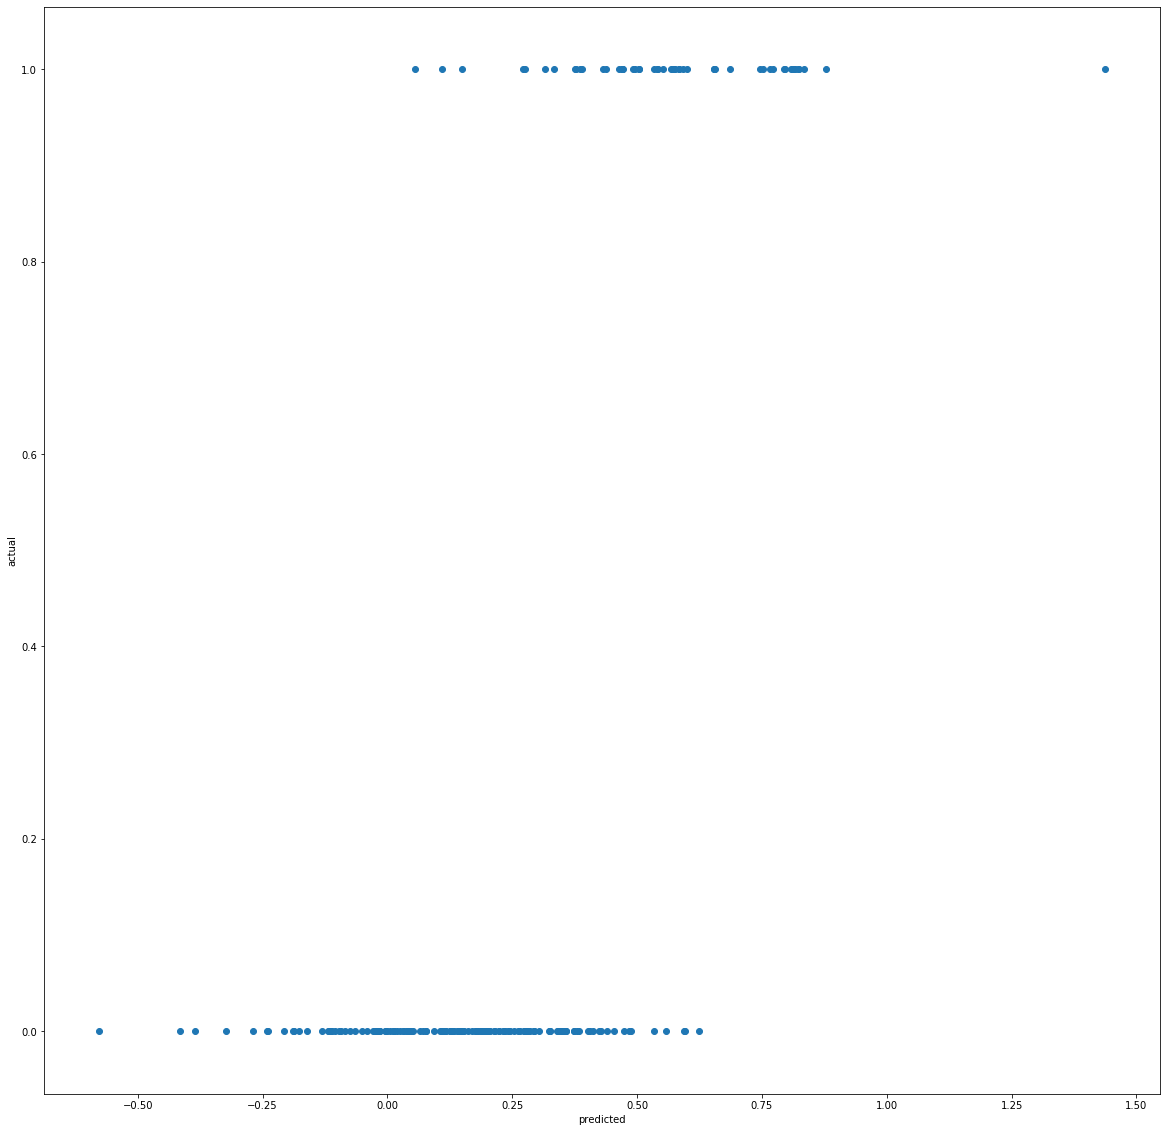

  0%|          | 0/5000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.75 0.8


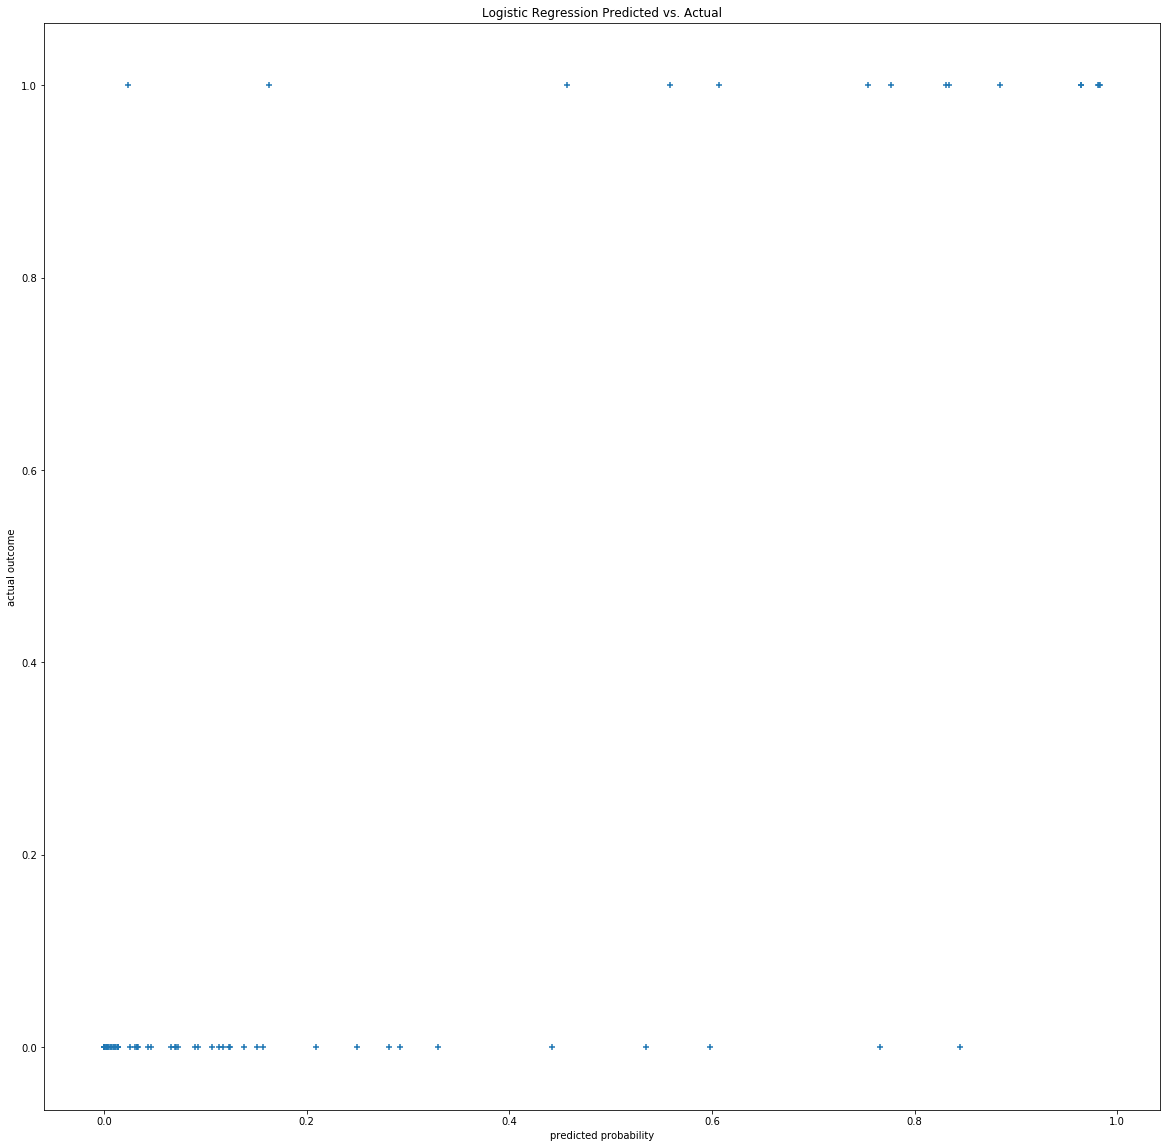

In [16]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

from matplotlib import pyplot as plt
import math
from scratch.linear_algebra import Vector, dot
from typing import List
from scratch.linear_algebra import vector_sum
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step
from scratch.machine_learning import train_test_split
import random
from tqdm.notebook import tqdm
from scratch.working_with_data import scale

def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """The negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta)
               for x, y in zip(xs, ys))

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The j-th partial derivative for one data pont
    here i is the index of the data point
    """
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient for one data point
    """
    return [_negative_log_partial_j(x, y, beta, j)
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

plt.close()
plt.clf()
plt.gca().clear()
    
learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]
    
plt.scatter(predictions, ys)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.gcf().set_size_inches(20,20)
plt.show()
   
#plt.savefig('im/linear_regression_for_probabilities.png')
plt.close()
    
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)
    
learning_rate = 0.01
    
# pick a random starting point
beta = [random.random() for _ in range(3)]
    
with tqdm(range(5000)) as t:
        for epoch in t:
            gradient = negative_log_gradient(x_train, y_train, beta)
            beta = gradient_step(beta, gradient, -learning_rate)
            loss = negative_log_likelihood(x_train, y_train, beta)
            t.set_description(f"loss: {loss:.3f} beta: {beta}")
    

    
means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
                      - beta[1] * means[1] / stdevs[1]
                      - beta[2] * means[2] / stdevs[2]),
                     beta[1] / stdevs[1],
                     beta[2] / stdevs[2]]
# [8.9, 1.6, -0.000288]
    
assert (negative_log_likelihood(xs, ys, beta_unscaled) ==
            negative_log_likelihood(rescaled_xs, ys, beta))
    
true_positives = false_positives = true_negatives = false_negatives = 0
    
for x_i, y_i in zip(x_test, y_test):
        prediction = logistic(dot(beta, x_i))
    
        if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid
            true_positives += 1
        elif y_i == 1:                      # FN: paid and we predict unpaid
            false_negatives += 1
        elif prediction >= 0.5:             # FP: unpaid and we predict paid
            false_positives += 1
        else:                               # TN: unpaid and we predict unpaid
            true_negatives += 1
    
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
    
print(precision, recall)
    
assert precision == 0.75
assert recall == 0.8
    
plt.clf()
plt.gca().clear()
    
predictions = [logistic(dot(beta, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.gcf().set_size_inches(20,20)
plt.show()
        
#plt.savefig('im/logistic_regression_predicted_vs_actual.png')
